# ***Install these Libraries before running the code***
**1. Pytorch**

pip install torch torchvision torchaudio        # PyTorch + torchvision (main dependency)

**2. Image handling**

pip install Pillow                              # PIL/Pillow

**3. Plotting and visualization**

pip install matplotlib

**4. Numerical operations and metrics**

pip install numpy

pip install scikit-learn                        # for confusion_matrix, classification_report, etc.

pip install seaborn

**1. Import Library**

In [2]:
import torch
import torch.nn as nn
from torchvision import models, transforms
from PIL import Image
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import torch.optim as optim
from torchvision import datasets, transforms, models
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import os

In [19]:
data_transform = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

In [3]:
data_dir = 'Dataset'

image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transform[x]) for x in ['train', 'val']}

In [4]:
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4, shuffle=True, num_workers=4) for x in ['train', 'val']}
dataset_sizers = {x: len(image_datasets[x]) for x in ['train', 'val']}
print(f"Dataset sizes: {dataset_sizers}")

class_names = image_datasets['train'].classes
class_names

Dataset sizes: {'train': 400, 'val': 187}


['Normal', 'Pothole']

In [5]:
model = models.resnet50(pretrained=True)

for name, param in model.named_parameters():
    if "fc" in name:
        param.requires_grad = True
    else:
        param.requires_grad = False

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

device = torch.device("cpu")
model = model.to(device)

c:\Users\musta\OneDrive - Umich\Desktop\CIS-552 Implementation\Deep Learning models\fuzzy\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\musta\OneDrive - Umich\Desktop\CIS-552 Implementation\Deep Learning models\fuzzy\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [6]:
num_epochs = 10
for epoch in range(num_epochs):
    print(f'Epoch {epoch+1}/{num_epochs}')
    print('-' * 10)

    for phase in ['train', 'val']:
        if phase == 'train':
            model.train()
        else:
            model.eval()

        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in dataloaders[phase]:
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            with torch.set_grad_enabled(phase == 'train'):
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                if phase == 'train':
                    loss.backward()
                    optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / dataset_sizers[phase]
        epoch_acc = running_corrects.double() / dataset_sizers[phase]

        print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

Epoch 1/10
----------
train Loss: 1.1995 Acc: 0.6575
val Loss: 0.2350 Acc: 0.9251
Epoch 2/10
----------
train Loss: 0.6137 Acc: 0.7675
val Loss: 0.2270 Acc: 0.9358
Epoch 3/10
----------
train Loss: 0.5523 Acc: 0.7700
val Loss: 0.1603 Acc: 0.9412
Epoch 4/10
----------
train Loss: 0.5329 Acc: 0.7925
val Loss: 0.2997 Acc: 0.8663
Epoch 5/10
----------
train Loss: 0.5892 Acc: 0.7675
val Loss: 0.2841 Acc: 0.8984
Epoch 6/10
----------
train Loss: 0.5987 Acc: 0.7625
val Loss: 0.1464 Acc: 0.9358
Epoch 7/10
----------
train Loss: 0.4542 Acc: 0.8175
val Loss: 0.1639 Acc: 0.9519
Epoch 8/10
----------
train Loss: 0.4374 Acc: 0.8100
val Loss: 0.1451 Acc: 0.9412
Epoch 9/10
----------
train Loss: 0.4969 Acc: 0.8150
val Loss: 0.1378 Acc: 0.9519
Epoch 10/10
----------
train Loss: 0.4691 Acc: 0.7975
val Loss: 0.2661 Acc: 0.9037


In [7]:
torch.save(model.state_dict(), 'resnet50_finetuned.pth')

**2. Load your model**

In [3]:
model = models.resnet50(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 1000)
model.load_state_dict(torch.load('resnet50_finetuned.pth', 'cpu'))
model.eval()

c:\Users\musta\OneDrive - Umich\Desktop\CIS-552 Implementation\Deep Learning models\fuzzy\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\musta\OneDrive - Umich\Desktop\CIS-552 Implementation\Deep Learning models\fuzzy\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

**3. Transfer first 2 classes**

In [4]:
new_model = models.resnet50(pretrained=True)
new_model.fc = nn.Linear(new_model.fc.in_features, 2)
new_model.fc.weight.data = model.fc.weight.data[:2]
new_model.fc.bias.data = model.fc.bias.data[:2]
new_model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

**4. Preprocessing**

In [5]:
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

**5. Test on a folder of images**

In [6]:
test_normal  = r"C:\Users\musta\OneDrive - Umich\Desktop\CIS-552 Implementation\Deep Learning models\Dataset\test\normal"     #<---- Remember to change path here
test_pothole = r"C:\Users\musta\OneDrive - Umich\Desktop\CIS-552 Implementation\Deep Learning models\Dataset\test\pothole"   #<---- Remember to change path here

true_labels = []
pred_labels = []

class_names = ['Normal Road', 'Pothole']

In [7]:
with torch.no_grad():
    # Test Normal images
    for img_name in os.listdir(test_normal):
        img_path = os.path.join(test_normal, img_name)
        img = Image.open(img_path).convert('RGB')
        input_tensor = preprocess(img).unsqueeze(0)
        output = new_model(input_tensor)
        _, pred = output.max(1)
        true_labels.append(0)
        pred_labels.append(pred.item())

    # Test Pothole images
    for img_name in os.listdir(test_pothole):
        img_path = os.path.join(test_pothole, img_name)
        img = Image.open(img_path).convert('RGB')
        input_tensor = preprocess(img).unsqueeze(0)
        output = new_model(input_tensor)
        _, pred = output.max(1)
        true_labels.append(1)
        pred_labels.append(pred.item())

**6. Confusion Matrix**

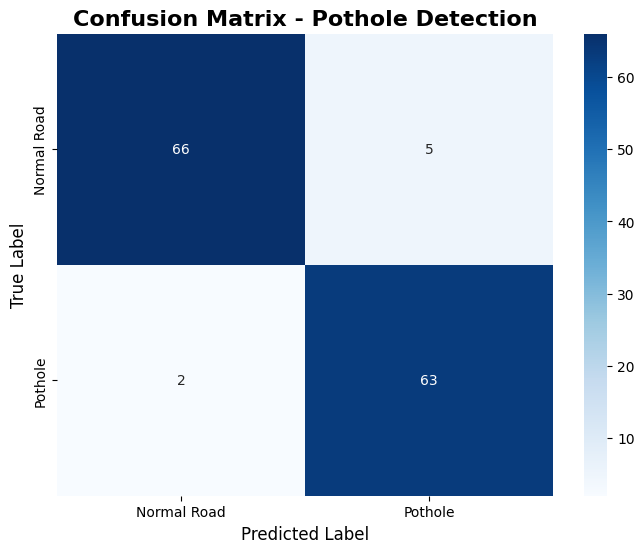

In [8]:
cm = confusion_matrix(true_labels, pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - Pothole Detection', fontsize=16, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.show()

**7. Print accuracy**

In [9]:
accuracy = accuracy_score(true_labels, pred_labels)
print(f"\nAccuracy: {accuracy*100:.2f}%")
print("\nResnet50 Classification Report:")
print(classification_report(true_labels, pred_labels, target_names=class_names))


Accuracy: 94.85%

Resnet50 Classification Report:
              precision    recall  f1-score   support

 Normal Road       0.97      0.93      0.95        71
     Pothole       0.93      0.97      0.95        65

    accuracy                           0.95       136
   macro avg       0.95      0.95      0.95       136
weighted avg       0.95      0.95      0.95       136



**8. Accuracy per class**

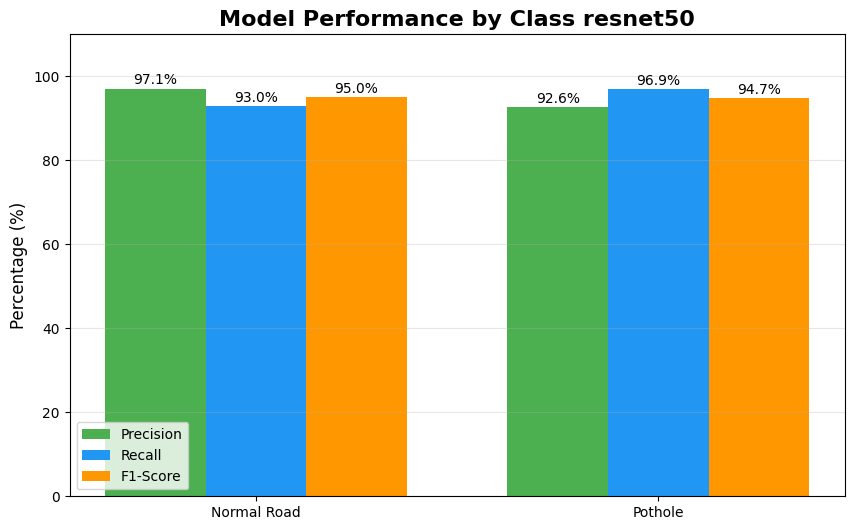

In [10]:
from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1, support = precision_recall_fscore_support(true_labels, pred_labels, average=None)

metrics_df = np.array([precision, recall, f1]) * 100
x = np.arange(2)
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width, metrics_df[0], width, label='Precision', color='#4CAF50')
ax.bar(x, metrics_df[1], width, label='Recall', color='#2196F3')
ax.bar(x + width, metrics_df[2], width, label='F1-Score', color='#FF9800')

ax.set_ylabel('Percentage (%)', fontsize=12)
ax.set_title('Model Performance by Class resnet50', fontsize=16, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(class_names)
ax.legend()
ax.grid(True, axis='y', alpha=0.3)

# Add value labels on bars
for i in range(3):
    for j, val in enumerate(metrics_df[i]):
        ax.text(j + (i-1)*width, val + 1, f'{val:.1f}%', ha='center', fontsize=10)

plt.ylim(0, 110)
plt.show()

**9. Show 6 predictions**

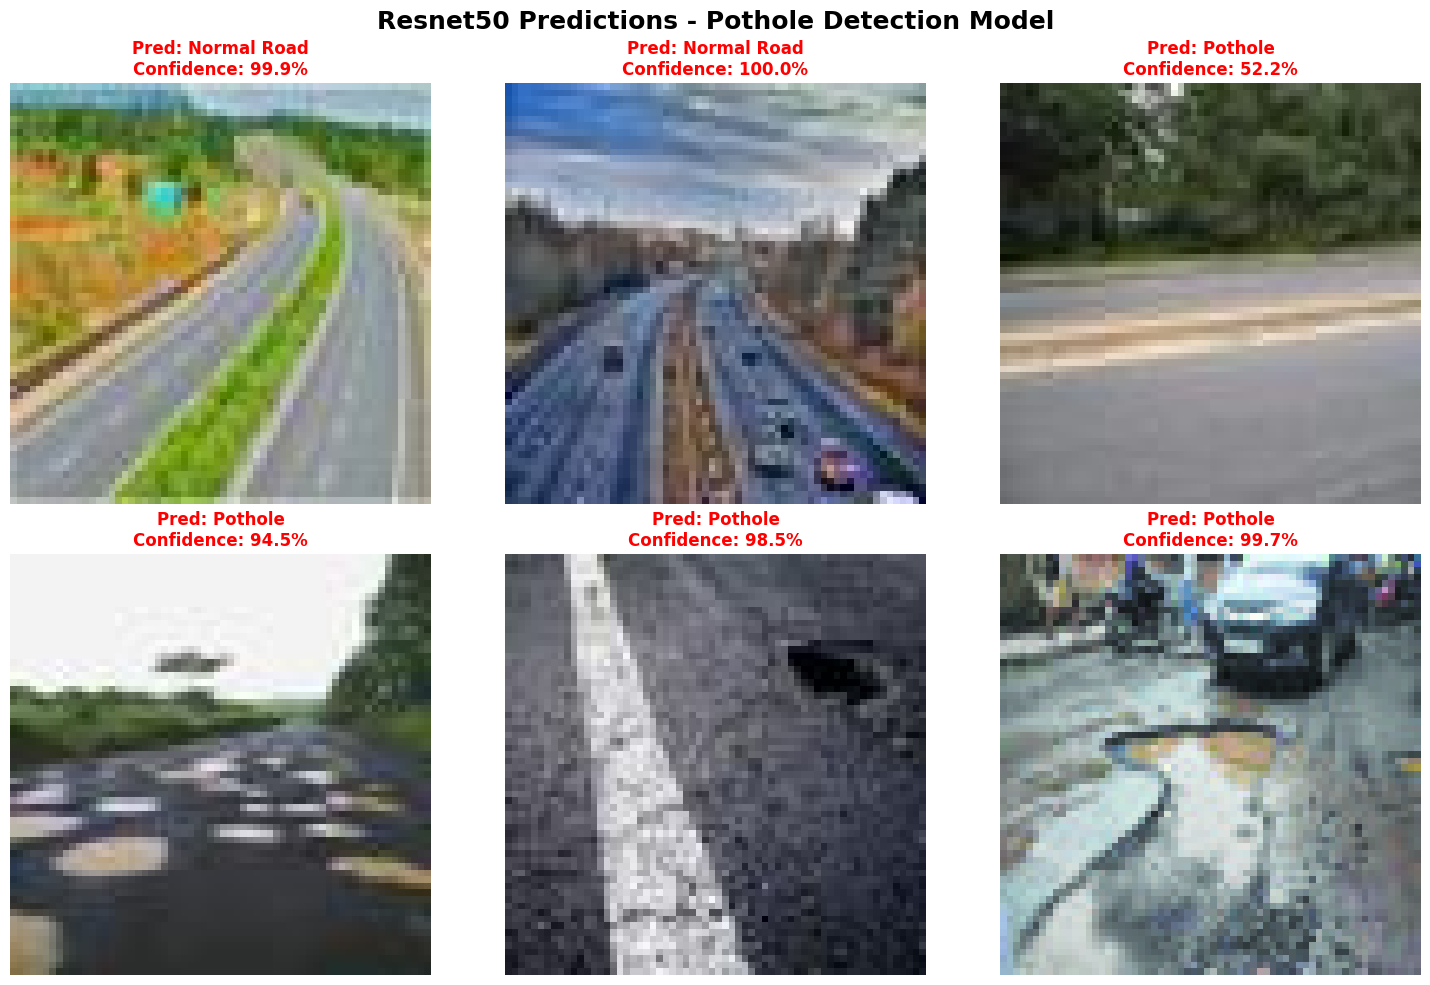

In [29]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()
sample_paths = [
    r"C:\Users\musta\OneDrive - Umich\Desktop\CIS-552 Implementation\Deep Learning models\Dataset\test\normal\normal0.jpg",
    r"C:\Users\musta\OneDrive - Umich\Desktop\CIS-552 Implementation\Deep Learning models\Dataset\test\normal\normal4.jpg", 
    r"C:\Users\musta\OneDrive - Umich\Desktop\CIS-552 Implementation\Deep Learning models\Dataset\test\normal\normal71.jpg",
    r"C:\Users\musta\OneDrive - Umich\Desktop\CIS-552 Implementation\Deep Learning models\Dataset\test\pothole\pothole836.jpg",
    r"C:\Users\musta\OneDrive - Umich\Desktop\CIS-552 Implementation\Deep Learning models\Dataset\test\pothole\pothole838.jpg",
    r"C:\Users\musta\OneDrive - Umich\Desktop\CIS-552 Implementation\Deep Learning models\Dataset\test\pothole\pothole840.jpg"
]

for i, path in enumerate(sample_paths[:6]):
    if not os.path.exists(path):
        continue
    img = Image.open(path).convert('RGB')
    input_tensor = preprocess(img).unsqueeze(0)
    with torch.no_grad():
        output = new_model(input_tensor)
        prob = torch.softmax(output, dim=1)
        pred_class = output.argmax(1).item()
        confidence = prob[0][pred_class].item() * 100
    
    axes[i].imshow(img)
    color = 'green' if (pred_class == 0 and 'Normal' in path) or (pred_class == 1 and 'Pothole' in path) else 'red'
    axes[i].set_title(f"Pred: {class_names[pred_class]}\nConfidence: {confidence:.1f}%", 
                      color=color, fontweight='bold', fontsize=12)
    axes[i].axis('off')

plt.suptitle('Resnet50 Predictions - Pothole Detection Model', fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()